# Multiple-try Metropolis

### Toy example

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#### Sampling from a two-dimensional mixture Gaussian Distribution $\pi(x)$
$$
\pi(x)=\frac{1}{3}\mathbf{N}_2(\mathbf{0},\mathbf{I}_2)+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
-6 \\
-6
\end{array}
\right),\left(\begin{array}{cc}
1 & 0.9 \\
0.9 & 1
\end{array}
\right)
\biggr\}+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
4 \\
4
\end{array}
\right),\left(\begin{array}{cc}
1 & -0.9 \\
-0.9 & 1
\end{array}
\right)
\biggr\}$$

In [3]:
def norm_mix(x):
    target = stats.multivariate_normal.pdf(x,[0,0],[[1,0],[0,1]])+stats.multivariate_normal.pdf(x,[-6,-6],[[1,0.9],[0.9,1]])+stats.multivariate_normal.pdf(x,[4,4],[[1,-0.9],[-0.9,1]])
    return target

# Need a contour plot for mixture Gaussian here

#### Method 1: Traditional Metropolis-Hastings sampler

In [4]:
n_iter = 50000
sigma = 1.5

# initial state
X = stats.uniform.rvs(loc=-5, scale=10, size=2, random_state=None)

# record the number of acceptances
accept = 0

# store the samples
MHsamples = np.zeros((n_iter,2))

# tuning parameter:
# sigma: variance of proposal

# MH sampler
for t in range(n_iter):
    # proposal: independent N(0,sigma)
    Y = X+stats.norm.rvs(0,sigma,2)
       
    # accept or reject
    u = stats.uniform.rvs(loc=0, scale=1, size=1)
    if u < norm_mix(Y)/norm_mix(X):
        X = Y
        accept += 1
    MHsamples[t] = X

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


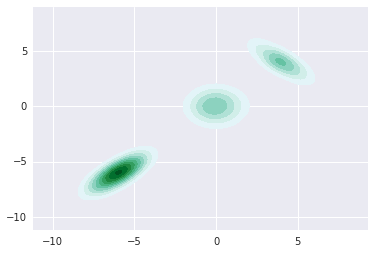

In [5]:
sns.kdeplot(MHsamples[:,0], MHsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)

#### Method 2: MTM sampler

In [132]:
n_iter = 10000
M = 10
sigma = 1.5

In [133]:
# initial state
X = stats.uniform.rvs(loc=-5, scale=10, size=2, random_state=None)

# record the number of acceptances
accept = 0

# store the samples
MTMsamples = np.zeros((n_iter,2))

# tuning parameter:
# sigma: variance of the proposal

# MTM sampler
for t in range(n_iter):
    # proposal: independent N(0,sigma)
    Y = np.tile(X,(M,1))+stats.norm.rvs(0,sigma,(M,2))
    
    # proposal importance probabilities
    w_prop = norm_mix(Y)
    
    # index of the chosen trial point
    ix = np.random.choice(M, 1, p=w_prop/sum(w_prop))
    
    # draw M-1 samples 
    X_star = np.tile(Y[ix],(M-1,1))+stats.norm.rvs(0,sigma,(M-1,2))
    # add X as M th sample
    X_star = np.vstack((X_star,X))
    
    # back importance probabilities
    w_back = norm_mix(X_star)
    
    # accept or reject
    u = stats.uniform.rvs(loc=0, scale=1, size=1)
    if u < sum(w_prop)/sum(w_back):
        X = Y[ix]
        accept += 1
    MTMsamples[t] = X

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


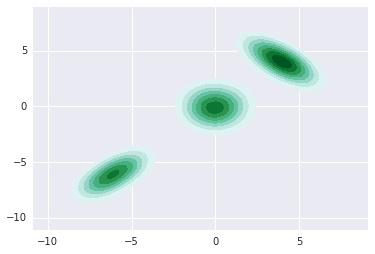

In [134]:
sns.kdeplot(MTMsamples[:,0], MTMsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)

# Also need to compare autocorrelation, acceptance here

## Variation 1: Conjugate-Gradient Monte Carlo (CGMC)

## Variation 2: Langevin-within-MTM